In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [3]:
night = "2017-09-28"
light_levels = df = pd.read_csv("../image/kriged/{}_filtd.csv".format(night))
df["timestamp"] = pd.to_datetime(df["timestamp"])


In [9]:
df["zexp"] = np.exp(df["z"])

In [12]:
df.head()

,Unnamed: 0,Unnamed: 0.1,x,y,z,timestamp,geometry,index_right,z_exp,zexp
0,223,223,-74.014080,40.700173,4.017016,2017-09-28 21:00:00,POINT (-74.0140797410063 40.70017257514655),0,55.535158,55.535158
1,224,224,-74.012869,40.700185,3.977927,2017-09-28 21:00:00,POINT (-74.01286857022636 40.7001846163299),0,53.406193,53.406193
2,225,225,-74.011657,40.700197,3.863668,2017-09-28 21:00:00,POINT (-74.0116573990083 40.7001966448284),0,47.639759,47.639759
3,276,276,-74.015307,40.701078,4.185543,2017-09-28 21:00:00,POINT (-74.0153067937795 40.70107825563972),0,65.729200,65.729200
4,277,277,-74.014096,40.701090,4.019000,2017-09-28 21:00:00,POINT (-74.0140956067373 40.70109030974864),0,55.645448,55.645448


In [13]:
def get_diffs(g):
    std = g.sort_values("timestamp")
    diff_light = std["z"][1:].values - std["z"][:-1].values
    diff_light_exp = std["zexp"][1:].values - std["zexp"][:-1].values
    return pd.DataFrame({"light": diff_light,
                         "ts": std["timestamp"][1:].values,
                         "light_exp": diff_light_exp,
                         "lat": std["x"].values[1:],
                         "lon": std["y"].values[1:]})


In [23]:
import matplotlib.pyplot as plt
from matplotlib import animation

from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_video(frame, field):
    fig, ax = plt.subplots(figsize=(10, 6))
    divider = make_axes_locatable(ax)

    cax = divider.append_axes('right', size='5%', pad=0.05)

    scatter = ax.scatter([frame["x"].min(), frame["x"].max()], 
                         [frame["y"].min(), frame["y"].max()],
                         c=[frame[field].min(), frame[field].max()])
    ax.set_xlim([frame["x"].min(), frame["x"].max()])
    ax.set_ylim([frame["y"].min(), frame["y"].max()])

    
    dates = np.sort(frame.ts.unique())
    def update_scatter(i):
        xy = frame[frame.ts == dates[i]]
        scatter.set_offsets(xy[['x', 'y']])
        scatter.set_array(xy[field])
        return scatter,

    anim = animation.FuncAnimation(fig, update_scatter,
                                   frames=len(dates), interval=400)
    fig.colorbar(scatter, cax=cax)

    return anim

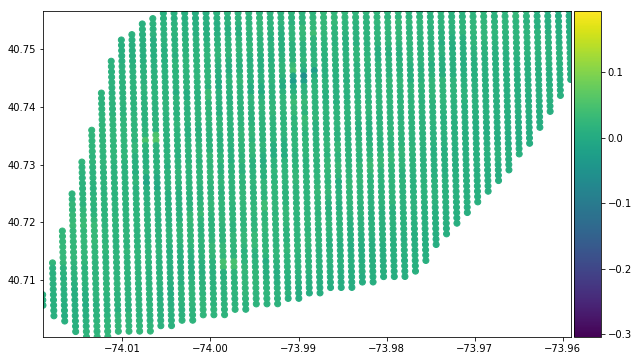

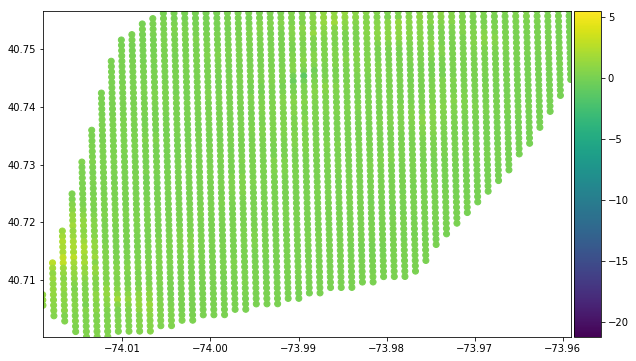

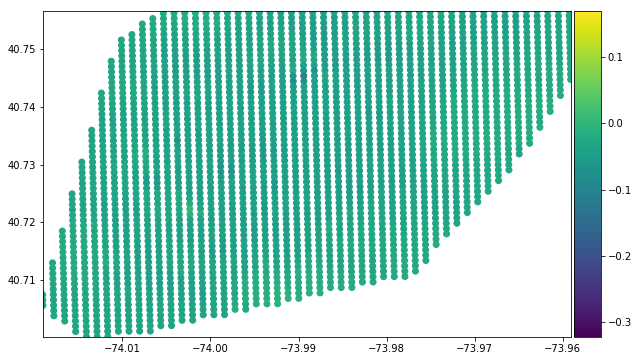

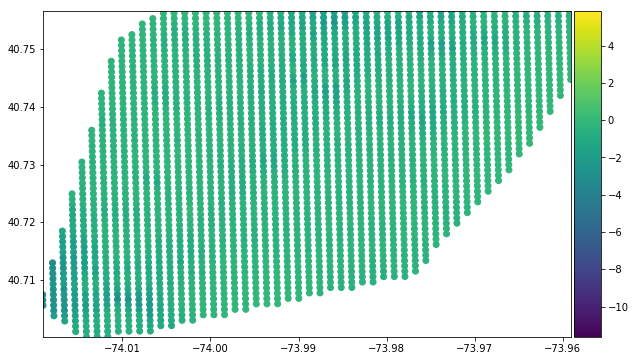

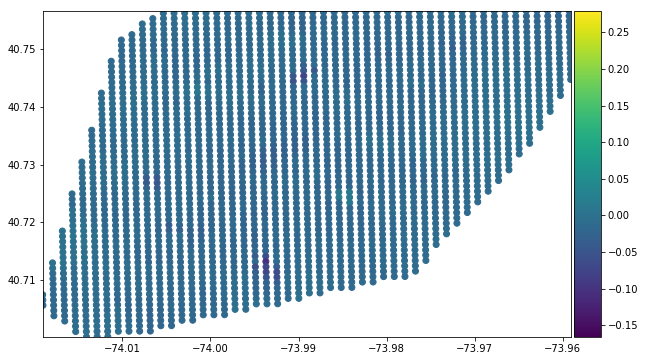

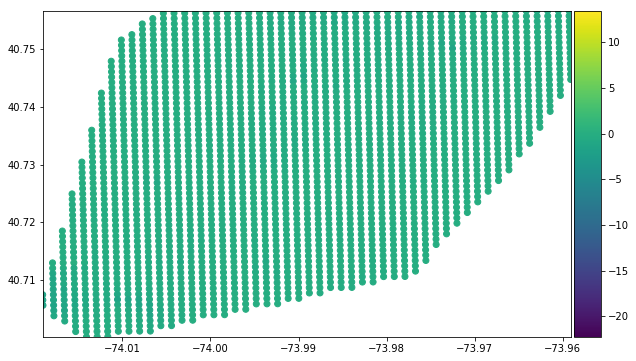

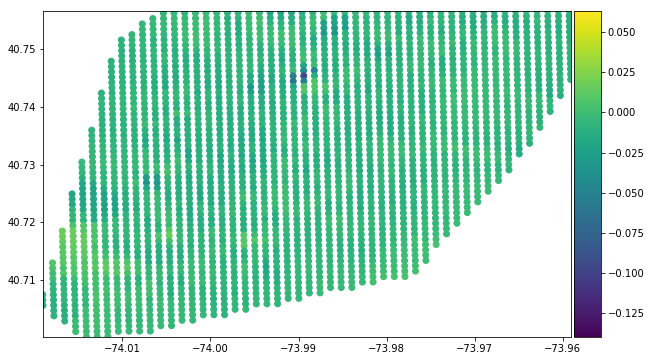

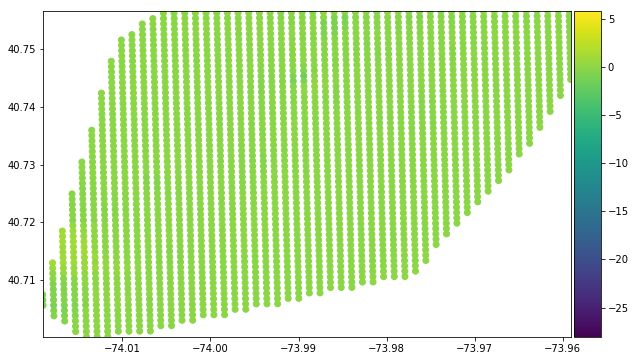

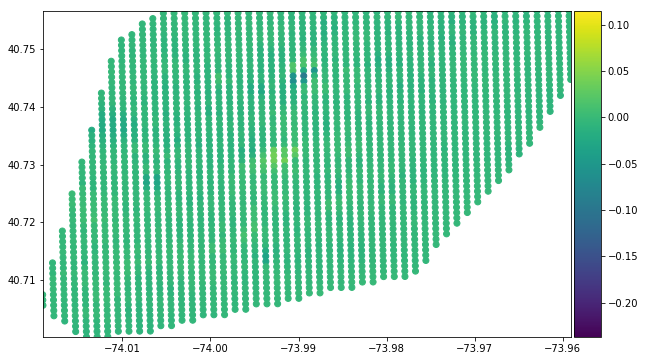

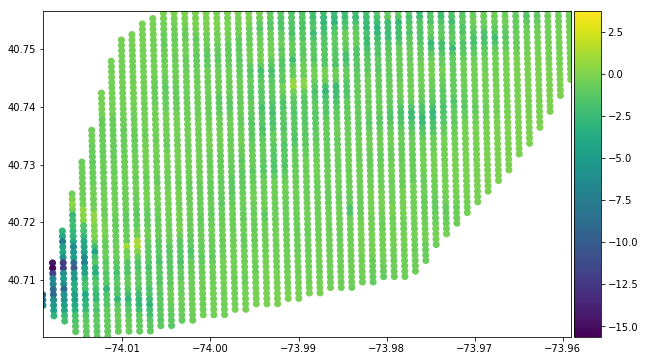

In [24]:
for night in ["2017-09-28", "2017-09-29", "2017-09-30", "2017-10-01", "2017-10-02"]:
    for field in ["light", "light_exp"]:
        light_levels = df = pd.read_csv("../image/kriged/{}_filtd.csv".format(night))
        df["timestamp"] = pd.to_datetime(df["timestamp"])
        df["zexp"] = np.exp(df["z"])
        grouped = df.groupby(['x', 'y']).apply(get_diffs).reset_index()
        anim = plot_video(grouped, field)
        anim.save(night + "_" + field + "_diff.mp4")